In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns


In [2]:
def missing_value(val):
    total = val.isnull().sum().sort_values(ascending = False)
    percent = (val.isnull().sum()/val.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# 1. CREDIT CARD BALANCE
## credit_card_balance.csv

* Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.
* This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has \
(#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.



* monthly balance of client's previous of credit card loans in "home_credit"

In [3]:
credit_card_balance = pd.read_csv('../input/home-credit-default-risk/credit_card_balance.csv')

In [4]:
credit_card_balance.shape

(3840312, 23)

In [5]:
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


### 1.1. Available columns and total number of columns

In [6]:
credit_card_balance.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')

### 1.2.Describe

In [7]:
credit_card_balance.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
count,3840312.00,3840312.00,3840312.00,3840312.00,3840312.00,3090496.00,3840312.00,3090496.00,3090496.00,3535076.00,...,3840312.00,3840312.00,3840312.00,3090496.00,3840312.00,3090496.00,3090496.00,3535076.00,3840312.00,3840312.00
mean,1904503.59,278324.21,-34.52,58300.16,153807.96,5961.32,7433.39,288.17,2968.80,3540.20,...,55965.88,58088.81,58098.29,0.31,0.70,0.00,0.56,20.83,9.28,0.33
std,536469.47,102704.48,26.67,106307.03,165145.70,28225.69,33846.08,8201.99,20796.89,5600.15,...,102533.62,105965.37,105971.80,1.10,3.19,0.08,3.24,20.05,97.52,21.48
min,1000018.00,100006.00,-96.00,-420250.18,0.00,-6827.31,-6211.62,0.00,0.00,0.00,...,-423305.82,-420250.18,-420250.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1434385.00,189517.00,-55.00,0.00,45000.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,0.00,0.00
50%,1897122.00,278396.00,-28.00,0.00,112500.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,15.00,0.00,0.00
75%,2369327.75,367580.00,-11.00,89046.69,180000.00,0.00,0.00,0.00,0.00,6633.91,...,85359.24,88899.49,88914.51,0.00,0.00,0.00,0.00,32.00,0.00,0.00
max,2843496.00,456250.00,-1.00,1505902.19,1350000.00,2115000.00,2287098.31,1529847.00,2239274.16,202882.01,...,1472316.79,1493338.19,1493338.19,51.00,165.00,12.00,165.00,120.00,3260.00,3260.00


In [8]:
credit_card_balance.duplicated().sum()

0

In [9]:
credit_card_balance.nunique()

SK_ID_PREV                     104307
SK_ID_CURR                     103558
MONTHS_BALANCE                     96
AMT_BALANCE                   1347904
AMT_CREDIT_LIMIT_ACTUAL           181
AMT_DRAWINGS_ATM_CURRENT         2267
AMT_DRAWINGS_CURRENT           187005
AMT_DRAWINGS_OTHER_CURRENT       1832
AMT_DRAWINGS_POS_CURRENT       168748
AMT_INST_MIN_REGULARITY        312266
AMT_PAYMENT_CURRENT            163209
AMT_PAYMENT_TOTAL_CURRENT      182957
AMT_RECEIVABLE_PRINCIPAL      1195839
AMT_RECIVABLE                 1338878
AMT_TOTAL_RECEIVABLE          1339008
CNT_DRAWINGS_ATM_CURRENT           44
CNT_DRAWINGS_CURRENT              129
CNT_DRAWINGS_OTHER_CURRENT         11
CNT_DRAWINGS_POS_CURRENT          133
CNT_INSTALMENT_MATURE_CUM         121
NAME_CONTRACT_STATUS                7
SK_DPD                            917
SK_DPD_DEF                        378
dtype: int64

### 1.3.Check for missing data

In [10]:
missing_value(credit_card_balance)

,Total,Percent
AMT_PAYMENT_CURRENT,767988,19.998063
AMT_DRAWINGS_ATM_CURRENT,749816,19.524872
CNT_DRAWINGS_POS_CURRENT,749816,19.524872
AMT_DRAWINGS_OTHER_CURRENT,749816,19.524872
AMT_DRAWINGS_POS_CURRENT,749816,19.524872
CNT_DRAWINGS_OTHER_CURRENT,749816,19.524872
CNT_DRAWINGS_ATM_CURRENT,749816,19.524872
CNT_INSTALMENT_MATURE_CUM,305236,7.948208
AMT_INST_MIN_REGULARITY,305236,7.948208
SK_ID_PREV,0,0.000000


### 1.4.CREDIT CARD BALANCE EDA

array([[<AxesSubplot:title={'center':'SK_ID_PREV'}>,
        <AxesSubplot:title={'center':'SK_ID_CURR'}>,
        <AxesSubplot:title={'center':'MONTHS_BALANCE'}>,
        <AxesSubplot:title={'center':'AMT_BALANCE'}>,
        <AxesSubplot:title={'center':'AMT_CREDIT_LIMIT_ACTUAL'}>],
       [<AxesSubplot:title={'center':'AMT_DRAWINGS_ATM_CURRENT'}>,
        <AxesSubplot:title={'center':'AMT_DRAWINGS_CURRENT'}>,
        <AxesSubplot:title={'center':'AMT_DRAWINGS_OTHER_CURRENT'}>,
        <AxesSubplot:title={'center':'AMT_DRAWINGS_POS_CURRENT'}>,
        <AxesSubplot:title={'center':'AMT_INST_MIN_REGULARITY'}>],
       [<AxesSubplot:title={'center':'AMT_PAYMENT_CURRENT'}>,
        <AxesSubplot:title={'center':'AMT_PAYMENT_TOTAL_CURRENT'}>,
        <AxesSubplot:title={'center':'AMT_RECEIVABLE_PRINCIPAL'}>,
        <AxesSubplot:title={'center':'AMT_RECIVABLE'}>,
        <AxesSubplot:title={'center':'AMT_TOTAL_RECEIVABLE'}>],
       [<AxesSubplot:title={'center':'CNT_DRAWINGS_ATM_CURRENT'}>,

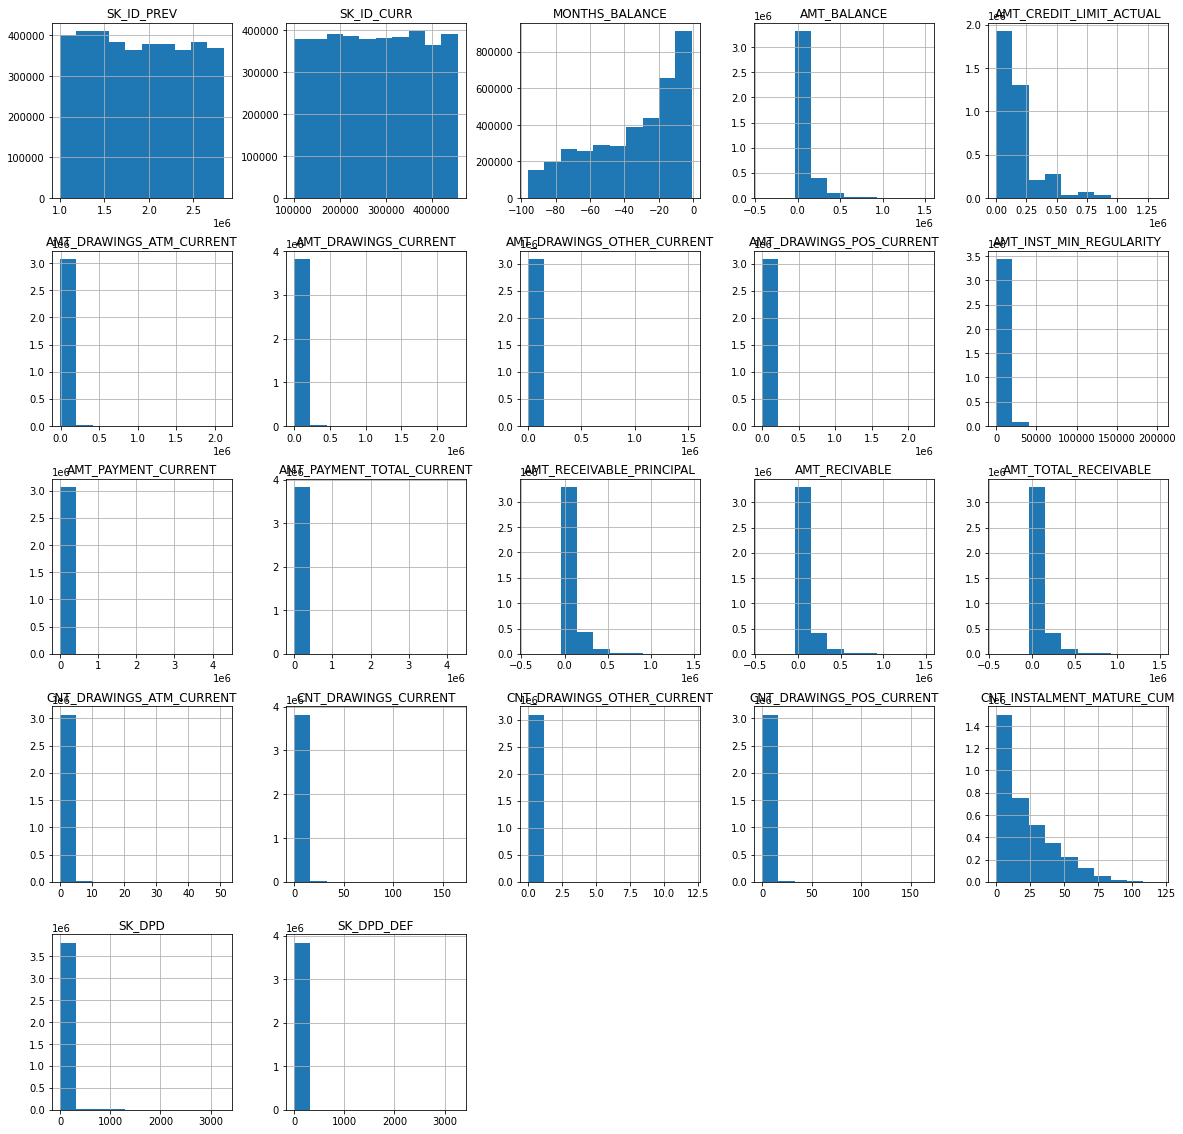

In [11]:
credit_card_balance.hist(figsize = (20,20))

In [12]:
# Delete columns containing either 90% or more than 90% NaN Values
perc = 90
min_count = int(((100-perc)/100)*credit_card_balance.shape[0]+1)

credit_card_balance.dropna(thresh=min_count, axis=1, inplace=True)
print(credit_card_balance.shape)

(3840312, 23)


### 1.4. a) Univariate Analysis : MONTHS_BALANCE

In [13]:
credit_card_balance['MONTHS_BALANCE'].describe().apply(lambda x: format(x, 'f'))

count    3840312.000000
mean         -34.521921
std           26.667751
min          -96.000000
25%          -55.000000
50%          -28.000000
75%          -11.000000
max           -1.000000
Name: MONTHS_BALANCE, dtype: object

In [14]:
credit_card_balance['MONTHS_BALANCE'].value_counts()

-4     102115
-5     100546
-3     100355
-6      98577
-7      95332
        ...  
-92     14911
-93     14197
-94     13397
-95     12521
-96     11722
Name: MONTHS_BALANCE, Length: 96, dtype: int64

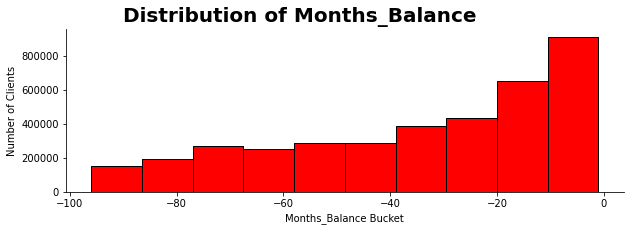

In [15]:
fig, ax = plt.subplots(figsize=(10,3))
ax.hist(credit_card_balance['MONTHS_BALANCE'].values, bins=10, edgecolor='black', color='red')
ax.set_xlabel('Months_Balance Bucket')
ax.set_ylabel('Number of Clients')
alist = ['right','top']
for i in alist:
    ax.spines[i].set_visible(False)
    
ax.text(-90,1000000,'Distribution of Months_Balance',size = 20,weight = 'bold')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


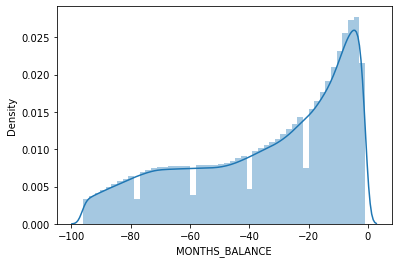

In [16]:
plt.figure(figsize=(6,4))
sns.distplot(credit_card_balance['MONTHS_BALANCE'], kde = True)
plt.show()

### => Observations :
The majority of clients have Months Balance values of 0 to 10 months before the application date.

### 1.4.  b) Univariate Analysis : CNT_DRAWINGS_CURRENT

In [17]:
credit_card_balance['CNT_DRAWINGS_CURRENT'].describe().apply(lambda x: format(x, 'f'))

count    3840312.000000
mean           0.703144
std            3.190347
min            0.000000
25%            0.000000
50%            0.000000
75%            0.000000
max          165.000000
Name: CNT_DRAWINGS_CURRENT, dtype: object

In [18]:
credit_card_balance['CNT_DRAWINGS_CURRENT'].value_counts()

0      3229952
1       231319
2       116762
3        65318
4        43290
        ...   
117          1
151          1
143          1
165          1
98           1
Name: CNT_DRAWINGS_CURRENT, Length: 129, dtype: int64

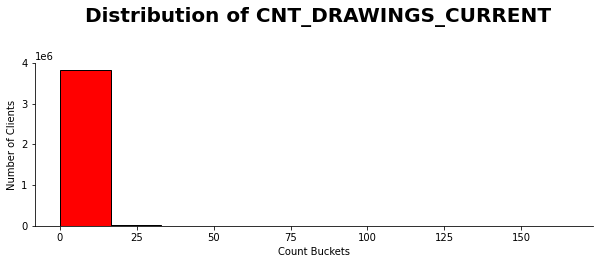

In [19]:
fig, ax = plt.subplots(figsize=(10,3))
ax.hist(credit_card_balance['CNT_DRAWINGS_CURRENT'].values, bins=10, edgecolor='black', color='red')
ax.set_xlabel('Count Buckets')
ax.set_ylabel('Number of Clients')
alist = ['right','top']
for i in alist:
    ax.spines[i].set_visible(False)
    
ax.text(8,5000000,'Distribution of CNT_DRAWINGS_CURRENT',size = 20,weight = 'bold')
plt.show()

### => Observations :
 With the exception of a very tiny number of outliers, the great majority of clients are drawing on their prior credit in the current month for less than 25 months.

### 1.4. c)Univariate Analysis : CNT_INSTALMENT_MATURE_CUM

In [20]:
credit_card_balance['CNT_INSTALMENT_MATURE_CUM'].describe().apply(lambda x: format(x, '0.3f'))

count    3535076.000
mean          20.825
std           20.051
min            0.000
25%            4.000
50%           15.000
75%           32.000
max          120.000
Name: CNT_INSTALMENT_MATURE_CUM, dtype: object

In [21]:
credit_card_balance['CNT_INSTALMENT_MATURE_CUM'].value_counts()

0.0      551467
5.0       91691
2.0       91035
4.0       89941
6.0       89829
          ...  
116.0         6
117.0         4
118.0         3
119.0         2
120.0         1
Name: CNT_INSTALMENT_MATURE_CUM, Length: 121, dtype: int64

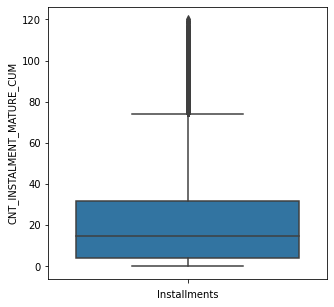

In [22]:
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(y='CNT_INSTALMENT_MATURE_CUM', data=credit_card_balance)
plt.xlabel('Installments')
plt.show()

<AxesSubplot:>

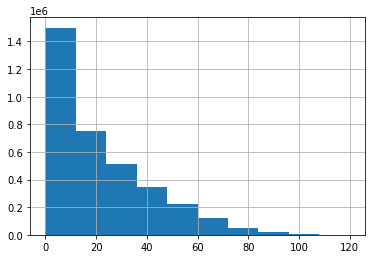

In [23]:
credit_card_balance['CNT_INSTALMENT_MATURE_CUM'].hist()

### => Observations :
* 'CNT_INSTALMENT_MATURE_CUM' (number of paid instalments on the previous credit), the minimum value is 0 whereas the maximum value is 120.
* 75% of the total values lying are less than 35.

### 1.4. d)Univariate Analysis : NAME_CONTRACT_STATUS

In [24]:
credit_card_balance['NAME_CONTRACT_STATUS'].describe()

count     3840312
unique          7
top        Active
freq      3698436
Name: NAME_CONTRACT_STATUS, dtype: object

In [25]:
credit_card_balance['NAME_CONTRACT_STATUS'].value_counts()

Active           3698436
Completed         128918
Signed             11058
Demand              1365
Sent proposal        513
Refused               17
Approved               5
Name: NAME_CONTRACT_STATUS, dtype: int64

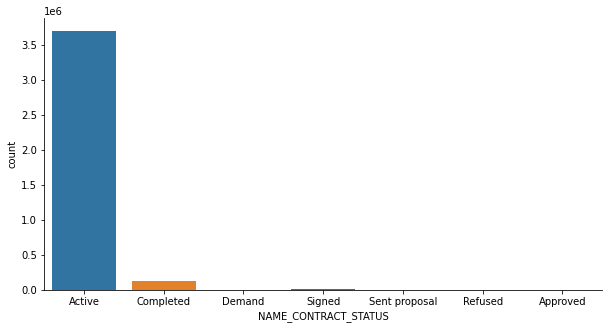

In [26]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x='NAME_CONTRACT_STATUS', data=credit_card_balance)

alist = ['right','top']
for i in alist:
    ax.spines[i].set_visible(False)
    
plt.show()

* There are 7 values in this columns
* 'Active'  is stand out the most.

# 

# 

# 2. INSTALLMENTS_PAYMENTS

## installments_payments.csv
* Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.
* There is one row for every payment that was made plus one row each for missed payment.
* One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.

In [27]:
installments_payments = pd.read_csv('../input/home-credit-default-risk/installments_payments.csv')

In [28]:
installments_payments.shape

(13605401, 8)

In [29]:
installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [30]:
installments_payments.duplicated().sum()

0

In [31]:
installments_payments.nunique()

SK_ID_PREV                997752
SK_ID_CURR                339587
NUM_INSTALMENT_VERSION        65
NUM_INSTALMENT_NUMBER        277
DAYS_INSTALMENT             2922
DAYS_ENTRY_PAYMENT          3039
AMT_INSTALMENT            902539
AMT_PAYMENT               944235
dtype: int64

In [32]:
installments_payments.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
NUM_INSTALMENT_VERSION       0
NUM_INSTALMENT_NUMBER        0
DAYS_INSTALMENT              0
DAYS_ENTRY_PAYMENT        2905
AMT_INSTALMENT               0
AMT_PAYMENT               2905
dtype: int64

### 2.1. Describe

In [33]:
installments_payments.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,13605401.00,13605401.00,13605401.00,13605401.00,13605401.00,13602496.00,13605401.00,13602496.00
mean,1903364.97,278444.88,0.86,18.87,-1042.27,-1051.11,17050.91,17238.22
std,536202.91,102718.31,1.04,26.66,800.95,800.59,50570.25,54735.78
min,1000001.00,100001.00,0.00,1.00,-2922.00,-4921.00,0.00,0.00
25%,1434191.00,189639.00,0.00,4.00,-1654.00,-1662.00,4226.09,3398.26
50%,1896520.00,278685.00,1.00,8.00,-818.00,-827.00,8884.08,8125.52
75%,2369094.00,367530.00,1.00,19.00,-361.00,-370.00,16710.21,16108.42
max,2843499.00,456255.00,178.00,277.00,-1.00,-1.00,3771487.85,3771487.85


### 2.2.Check for missing data

In [34]:
missing_value(installments_payments)

,Total,Percent
DAYS_ENTRY_PAYMENT,2905,0.021352
AMT_PAYMENT,2905,0.021352
SK_ID_PREV,0,0.000000
SK_ID_CURR,0,0.000000
NUM_INSTALMENT_VERSION,0,0.000000
NUM_INSTALMENT_NUMBER,0,0.000000
DAYS_INSTALMENT,0,0.000000
AMT_INSTALMENT,0,0.000000


### 2.3. INSTALLMENTS PAYMENTS EDA

array([[<AxesSubplot:title={'center':'SK_ID_PREV'}>,
        <AxesSubplot:title={'center':'SK_ID_CURR'}>,
        <AxesSubplot:title={'center':'NUM_INSTALMENT_VERSION'}>],
       [<AxesSubplot:title={'center':'NUM_INSTALMENT_NUMBER'}>,
        <AxesSubplot:title={'center':'DAYS_INSTALMENT'}>,
        <AxesSubplot:title={'center':'DAYS_ENTRY_PAYMENT'}>],
       [<AxesSubplot:title={'center':'AMT_INSTALMENT'}>,
        <AxesSubplot:title={'center':'AMT_PAYMENT'}>, <AxesSubplot:>]],
      dtype=object)

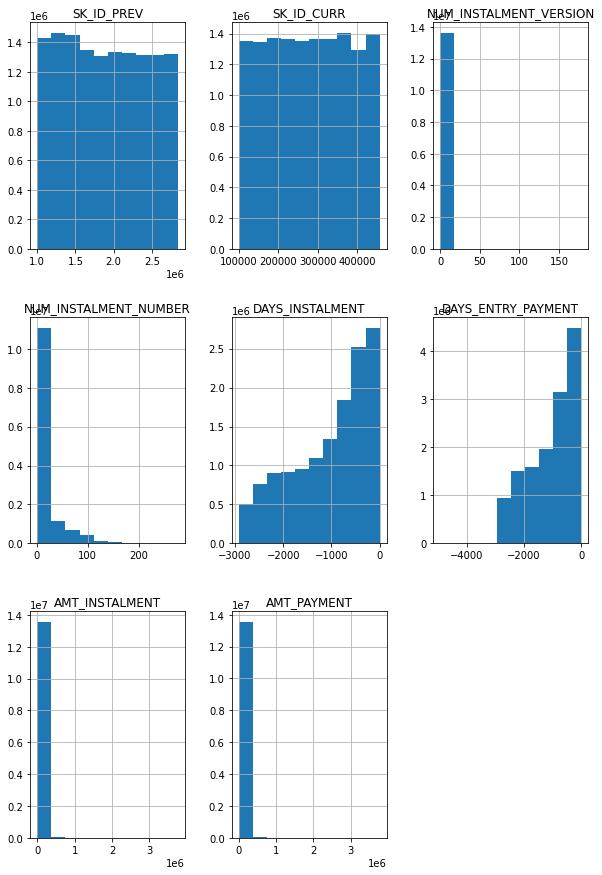

In [35]:
installments_payments.hist(figsize = (10,15))

### 2.3.  a) Univariate Analysis : NUM_INSTALMENT_NUMBER

In [36]:
installments_payments['NUM_INSTALMENT_NUMBER'].value_counts()

1      1004160
2       985716
3       968279
4       943502
5       880007
        ...   
275          2
269          2
277          1
274          1
276          1
Name: NUM_INSTALMENT_NUMBER, Length: 277, dtype: int64

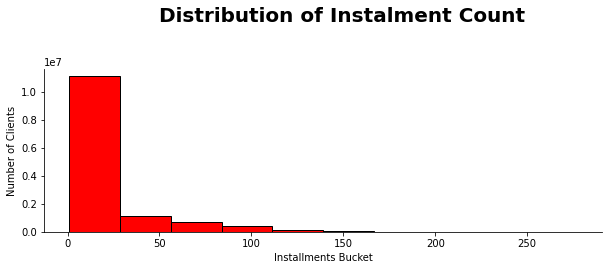

In [37]:
fig, ax = plt.subplots(figsize=(10,3))
ax.hist(installments_payments['NUM_INSTALMENT_NUMBER'].values, bins=10, edgecolor='black', color='red')
ax.set_xlabel('Installments Bucket')
ax.set_ylabel('Number of Clients')
alist = ['right','top']
for i in alist:
    ax.spines[i].set_visible(False)
    
ax.text(50,15000000,'Distribution of Instalment Count',size = 20,weight = 'bold')
plt.show()

=> **Observations** :
Most of the clients complete their instalment payment before 25 months.

### 2.3.  b) Univariate Analysis : AMT_PAYMENT

In [38]:
installments_payments['AMT_PAYMENT'].value_counts()

9000.000      248757
2250.000      182654
4500.000      178309
6750.000      170360
3375.000      141832
               ...  
205825.365         1
162491.760         1
42613.920          1
25635.555          1
46517.490          1
Name: AMT_PAYMENT, Length: 944235, dtype: int64

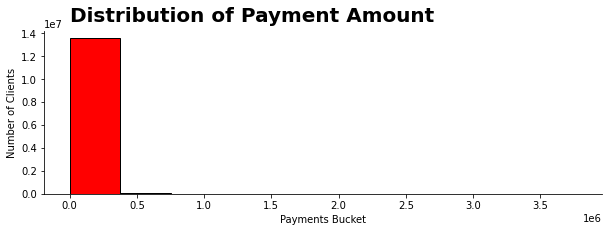

In [39]:
fig, ax = plt.subplots(figsize=(10,3))
ax.hist(installments_payments['AMT_PAYMENT'].values, bins=10, edgecolor='black', color='red')
ax.set_xlabel('Payments Bucket')
ax.set_ylabel('Number of Clients')
alist = ['right','top']
for i in alist:
    ax.spines[i].set_visible(False)
    
ax.text(50,15000000,'Distribution of Payment Amount',size = 20,weight = 'bold')
plt.show()

## => Observations :
Most of the clients paid less than 50000$ on previous credit on the same installment.

### 2.3.  c)  Univariate Analysis : DAYS_ENTRY_PAYMENT

In [40]:
installments_payments['DAYS_ENTRY_PAYMENT'].value_counts()

-91.0      13103
-182.0     13090
-154.0     13071
-92.0      12646
-245.0     12405
           ...  
-3115.0        1
-3078.0        1
-3010.0        1
-3063.0        1
-3096.0        1
Name: DAYS_ENTRY_PAYMENT, Length: 3039, dtype: int64

<AxesSubplot:>

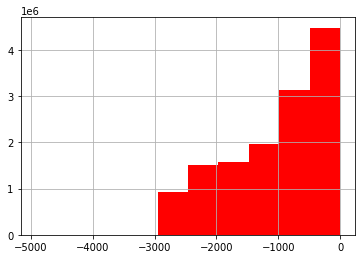

In [41]:
installments_payments['DAYS_ENTRY_PAYMENT'].hist(color='red')